# Fixed Lies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("data/fixed_lies/test_map_fixed_lies_x_liars_random.csv")

In [3]:
data

,node,is_liar,is_blacklisted,lie,lieClusterSize
0,N0,True,True,18173,5
1,N0,True,True,35793,5
2,N0,True,True,4696,5
3,N0,True,True,36502,5
4,N0,True,True,20049,5
5,N0,True,True,20585,5
6,N0,True,True,8829,5
7,N0,True,True,16483,5
8,N0,True,True,11980,5
9,N0,True,True,41217,5


In [4]:
data["grouped"] = list(zip(data.is_liar, data.is_blacklisted))
grouped_data = data[["node", "grouped", "lieClusterSize"]]

In [5]:
grouped_data

,node,grouped,lieClusterSize
0,N0,"(True, True)",5
1,N0,"(True, True)",5
2,N0,"(True, True)",5
3,N0,"(True, True)",5
4,N0,"(True, True)",5
5,N0,"(True, True)",5
6,N0,"(True, True)",5
7,N0,"(True, True)",5
8,N0,"(True, True)",5
9,N0,"(True, True)",5


In [6]:
grouped_by_node = grouped_data.groupby(["node", "lieClusterSize"]).agg(lambda x: set(x.values.tolist()))

In [7]:
grouped_by_node["nb_situations"] = grouped_by_node['grouped'].map(lambda x: len(x))

In [8]:
grouped_by_node.sort_values(by="nb_situations", ascending=False)

grouped  nb_situations
node lieClusterSize                                 
N0   5                 {(True, True)}              1
N72  33              {(False, False)}              1
N74  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N73  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N72  20              {(False, False)}              1
N0   10                {(True, True)}              1
N72  10              {(False, False)}              1
     5               {(False, False)}              1
N71  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N70  33              {(False, False)}              1
     20              {(False, False)}              1
N75  5               {(False, False)}              1
     10              {(False, False)}              1
     20              {(False, False)}              1
     33              {(False, False)}              1
N8   10                {(True, True)}              1
N79  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N78  33              {(False, False)}              1
...                               ...            ...
N43  5               {(False, False)}              1
N42  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N41  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
N45  20              {(False, False)}              1
N46  5               {(False, False)}              1
N50  5               {(False, False)}              1
N46  10              {(False, False)}              1
N5   33                {(True, True)}              1
     20                {(True, True)}              1
     10                {(True, True)}              1
N49  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N48  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N47  33              {(False, False)}              1
     20              {(False, False)}              1
     10              {(False, False)}              1
     5               {(False, False)}              1
N46  33              {(False, False)}              1
     20              {(False, False)}              1
N99  33              {(False, False)}              1

[336 rows x 2 columns]

In [9]:
data[["node", "lieClusterSize","is_liar", "is_blacklisted"]]\
.groupby(["is_liar", "is_blacklisted", "lieClusterSize"]).count()

node
is_liar is_blacklisted lieClusterSize      
False   False          5                 67
                       10                67
                       20                67
                       33                67
True    False          33              1200
        True           5                485
                       10               945
                       20              1790
                       33              1539

In [10]:
lies = data[["lieClusterSize","is_blacklisted"]][data["lie"] > 0]

In [11]:
lies.groupby("lieClusterSize").agg(lambda x: set(x.values.tolist())).reset_index()

,lieClusterSize,is_blacklisted
0,5,{True}
1,10,{True}
2,20,{True}
3,33,"{False, True}"


In [12]:
bl_by_lie = lies.groupby(['lieClusterSize', 'is_blacklisted']).size().unstack(fill_value=0).reset_index()

In [13]:
bl_by_lie

is_blacklisted,lieClusterSize,False,True
0,5,0,485
1,10,0,945
2,20,0,1790
3,33,1200,1539


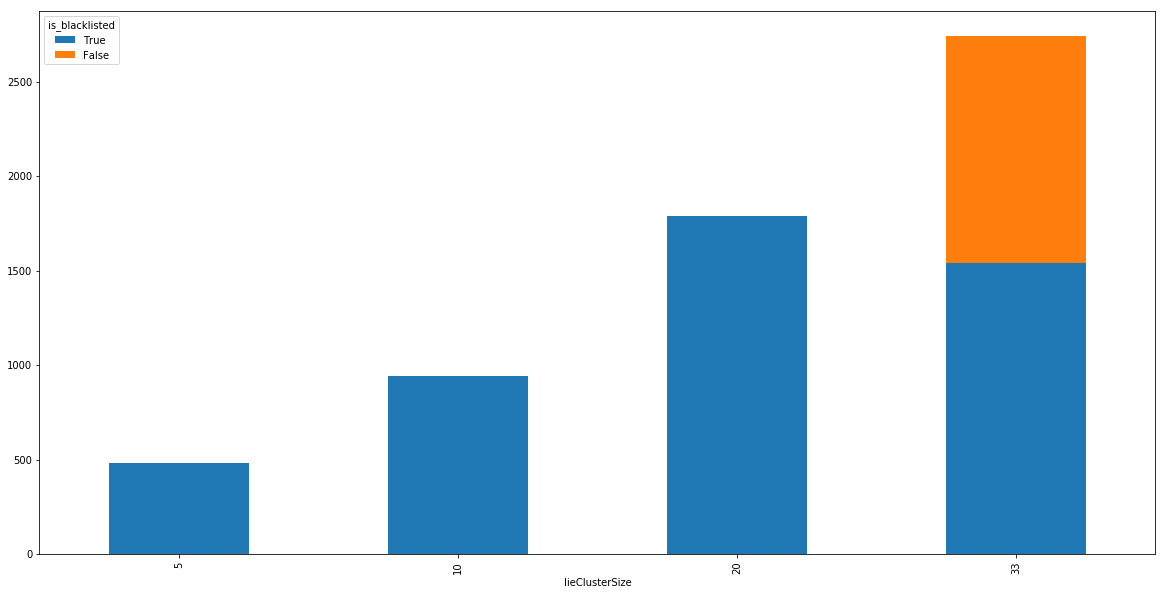

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
bl_by_lie[["lieClusterSize", True, False]]\
.groupby("lieClusterSize").sum().reset_index().plot.bar(stacked=True, ax=ax, x="lieClusterSize")

In [15]:
fig.savefig('graphs/fixed_lies/test_map_fixed_lies_x_liars_random.png')